In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline

style.use('ggplot')

import plotly
import plotly.express as px
import plotly.graph_objects as go
#plt.rcParams['figure.figsize']=17,12

import cufflinks as cf
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot
import folium


In [7]:
pyo.init_notebook_mode(connected=True)
cf.go_offline()

In [8]:
df = pd.read_excel('Vaccine dose provided throughout state.xlsx')

In [9]:
df

,S. No.,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death
0,1,Andhra Pradesh,12,0,1,0
1,2,Chhattisgarh,6,0,0,0
2,3,Delhi,38,1,6,1
3,4,Gujarat,43,0,0,3
4,5,Haryana,16,14,11,0
5,6,Himachal Pradesh,4,0,0,1
6,7,Karnataka,20,0,3,2
7,8,Kerala,131,7,11,0
8,9,Madhya Pradesh,23,0,0,1
9,10,Maharashtra,144,3,15,4


In [10]:
df.drop(['S. No.'],axis=1,inplace=True)

In [11]:
df

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death
0,Andhra Pradesh,12,0,1,0
1,Chhattisgarh,6,0,0,0
2,Delhi,38,1,6,1
3,Gujarat,43,0,0,3
4,Haryana,16,14,11,0
5,Himachal Pradesh,4,0,0,1
6,Karnataka,20,0,3,2
7,Kerala,131,7,11,0
8,Madhya Pradesh,23,0,0,1
9,Maharashtra,144,3,15,4


In [12]:
df['Active cases']=df['Total Confirmed cases (Indian National)']-(df['Cured']+df['Death'])

In [13]:
df

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Active cases
0,Andhra Pradesh,12,0,1,0,11
1,Chhattisgarh,6,0,0,0,6
2,Delhi,38,1,6,1,31
3,Gujarat,43,0,0,3,40
4,Haryana,16,14,11,0,5
5,Himachal Pradesh,4,0,0,1,3
6,Karnataka,20,0,3,2,15
7,Kerala,131,7,11,0,120
8,Madhya Pradesh,23,0,0,1,22
9,Maharashtra,144,3,15,4,125


In [14]:
total_india_case=df['Active cases'].sum()

In [15]:
print('The total no.of active cases in india is',total_india_case)

The total no.of active cases in india is 606


In [16]:
df.style.background_gradient(cmap='Blues')

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Active cases
0,Andhra Pradesh,12,0,1,0,11
1,Chhattisgarh,6,0,0,0,6
2,Delhi,38,1,6,1,31
3,Gujarat,43,0,0,3,40
4,Haryana,16,14,11,0,5
5,Himachal Pradesh,4,0,0,1,3
6,Karnataka,20,0,3,2,15
7,Kerala,131,7,11,0,120
8,Madhya Pradesh,23,0,0,1,22
9,Maharashtra,144,3,15,4,125


In [17]:
Total_number_Active_state_cases = df.groupby('Name of State / UT')['Active cases'].sum().sort_values(ascending=False).to_frame()

In [18]:
Total_number_Active_state_cases.style.background_gradient(cmap='Reds')

,Active cases
Name of State / UT,
Maharashtra,125
Kerala,120
Gujarat,40
Rajasthan,38
Telengana,33
Uttar Pradesh,31
Delhi,31
Tamil Nadu,30
Punjab,28


In [74]:
df.iplot(kind='bar',x='Name of State / UT',y='Active cases')

In [20]:
df.iplot(kind='scatter',x='Name of State / UT',y='Active cases',mode='markers+lines',title="Covid-19 Graph",xTitle="States",yTitle="No.Of covid-19 cases")

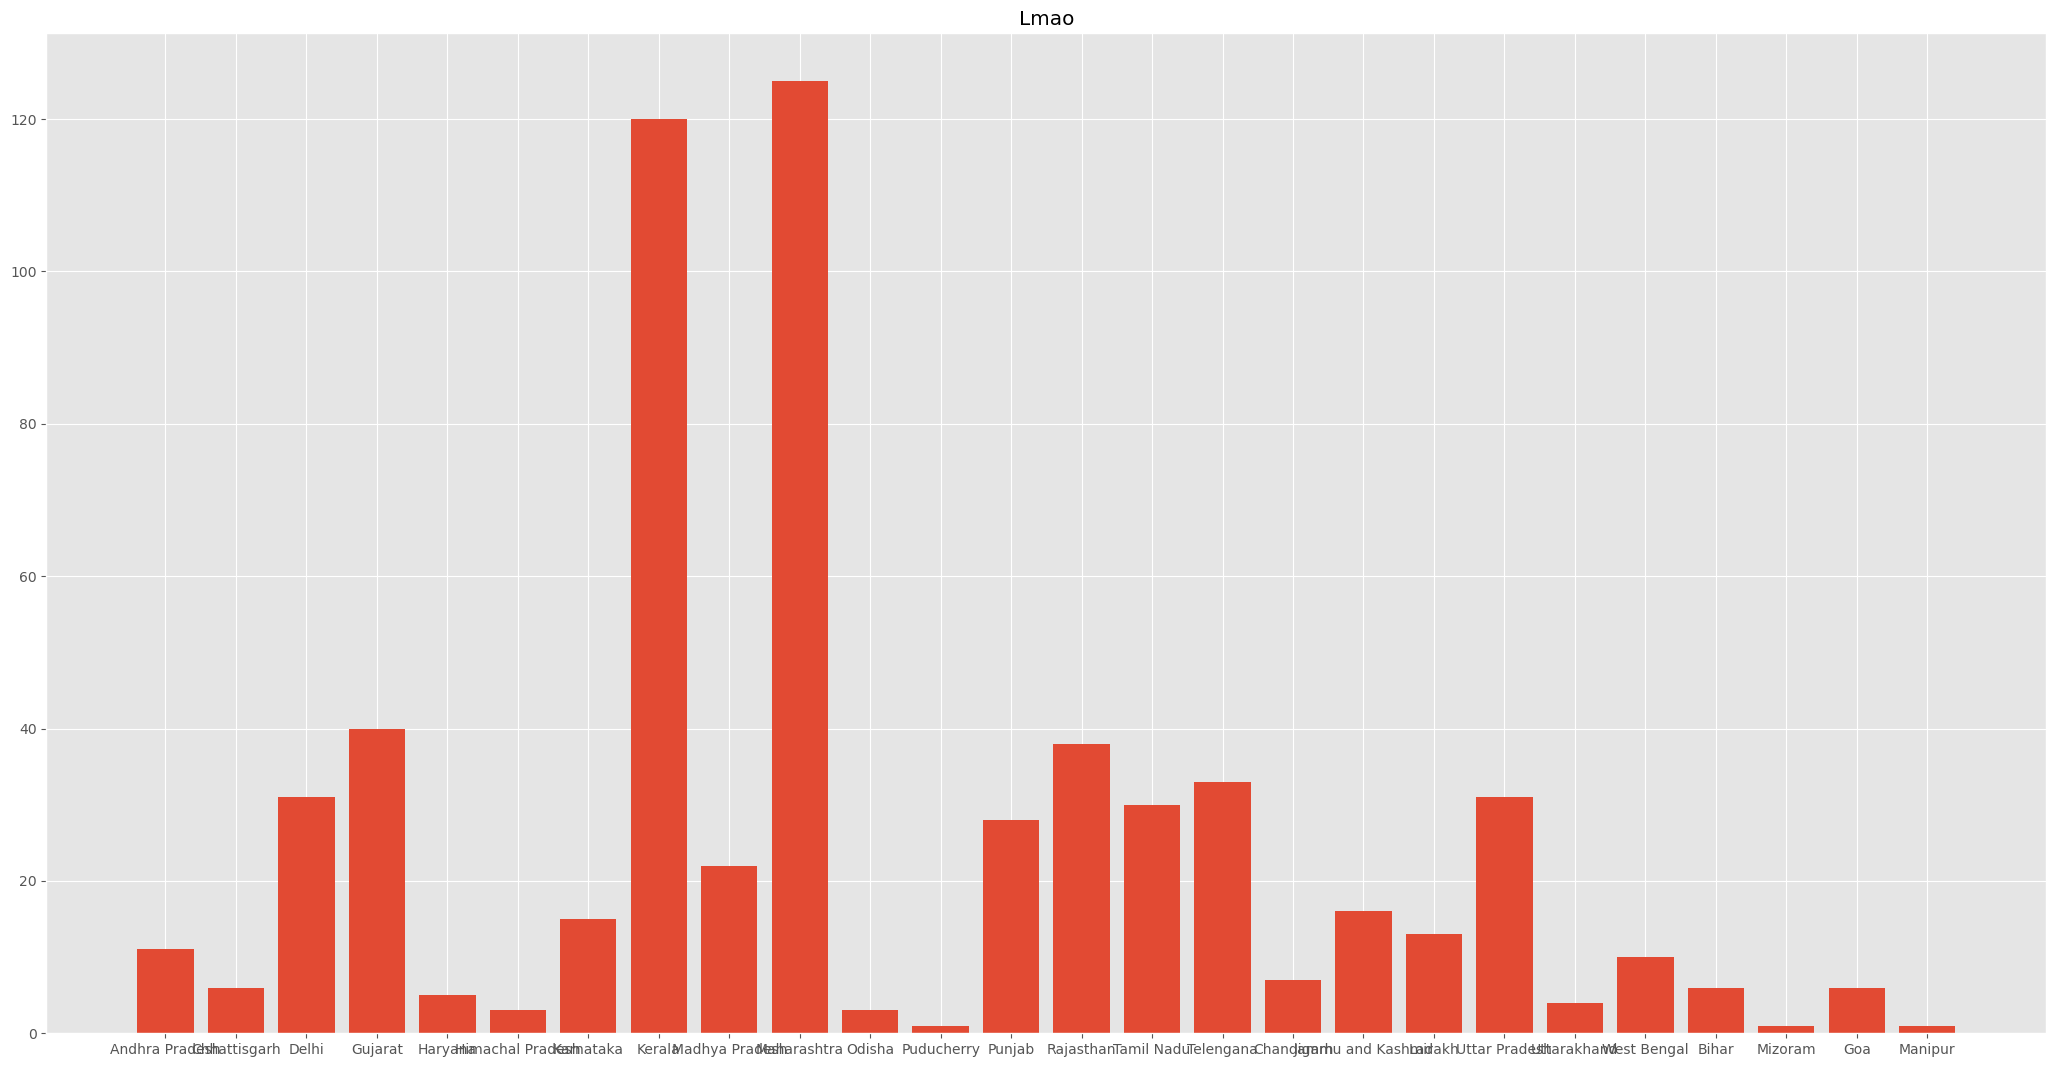

In [25]:
fig=plt.figure(figsize=(20,10),dpi=100)
axes=fig.add_axes([0,0,1,1,])
axes.bar(df['Name of State / UT'],df['Active cases'])
axes.set_title("Lmao")
plt.show()


In [28]:
indian_cord=pd.read_excel("Indian Coordinates.xlsx")

In [29]:
indian_cord

,Name of State / UT,Latitude,Longitude
0,Andaman And Nicobar,11.667026,92.735983
1,Andhra Pradesh,14.750429,78.570026
2,Arunachal Pradesh,27.100399,93.616601
3,Assam,26.749981,94.216667
4,Bihar,25.785414,87.479973
5,Chandigarh,30.719997,76.780006
6,Chhattisgarh,22.090420,82.159987
7,Dadra And Nagar Haveli,20.266578,73.016618
8,Delhi,28.669993,77.230004
9,Goa,15.491997,73.818001


In [34]:
df_full=pd.merge(indian_cord,df,on='Name of State / UT')

In [35]:
df_full

,Name of State / UT,Latitude,Longitude,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Active cases
0,Andhra Pradesh,14.750429,78.570026,12,0,1,0,11
1,Delhi,28.669993,77.230004,38,1,6,1,31
2,Haryana,28.450006,77.019991,16,14,11,0,5
3,Karnataka,12.570381,76.919997,20,0,3,2,15
4,Kerala,8.900373,76.569993,131,7,11,0,120
5,Maharashtra,19.250232,73.160175,144,3,15,4,125
6,Punjab,31.519974,75.980003,29,0,0,1,28
7,Rajasthan,26.449999,74.639981,41,2,3,0,38
8,Telengana,18.112400,79.019300,34,11,1,0,33
9,Tamil Nadu,12.920386,79.150042,32,3,1,1,30


In [68]:
map=folium.Map(location=[20,70],zoom_start=4,tiles='stamenterrain')
for lat,long,value, name in zip(df_full['Latitude'],df_full['Longitude'],df_full['Active cases'],df_full['Name of State / UT']):
   folium.CircleMarker([lat,long],radius=value*0.8,popup=('<strong>State</strong>: '+str(name).capitalize()+'<br>''<strong>Active cases</strong>: ' + str(value)+ '<br>'),color='red',fill_color='red',fill_opacity=0.3).add_to(map)

In [69]:
map

In [ ]:
#how cases rising in worls

In [59]:
dbd_India=pd.read_excel("per_day_cases.xlsx",parse_dates=True,sheet_name="India")
dbd_Italy=pd.read_excel("per_day_cases.xlsx",parse_dates=True,sheet_name="Italy")
dbd_Korea=pd.read_excel("per_day_cases.xlsx",parse_dates=True,sheet_name="Korea")
dbd_Wuhan=pd.read_excel("per_day_cases.xlsx",parse_dates=True,sheet_name="Wuhan")


In [66]:
dbd_India

,Date,Total Cases,New Cases,Days after surpassing 100 cases
0,2020-01-30,1,1,NaN
1,2020-01-31,1,0,NaN
2,2020-02-01,1,0,NaN
3,2020-02-02,2,1,NaN
4,2020-02-03,3,1,NaN
5,2020-02-04,3,0,NaN
6,2020-02-05,3,0,NaN
7,2020-02-06,3,0,NaN
8,2020-02-07,3,0,NaN
9,2020-02-08,3,0,NaN


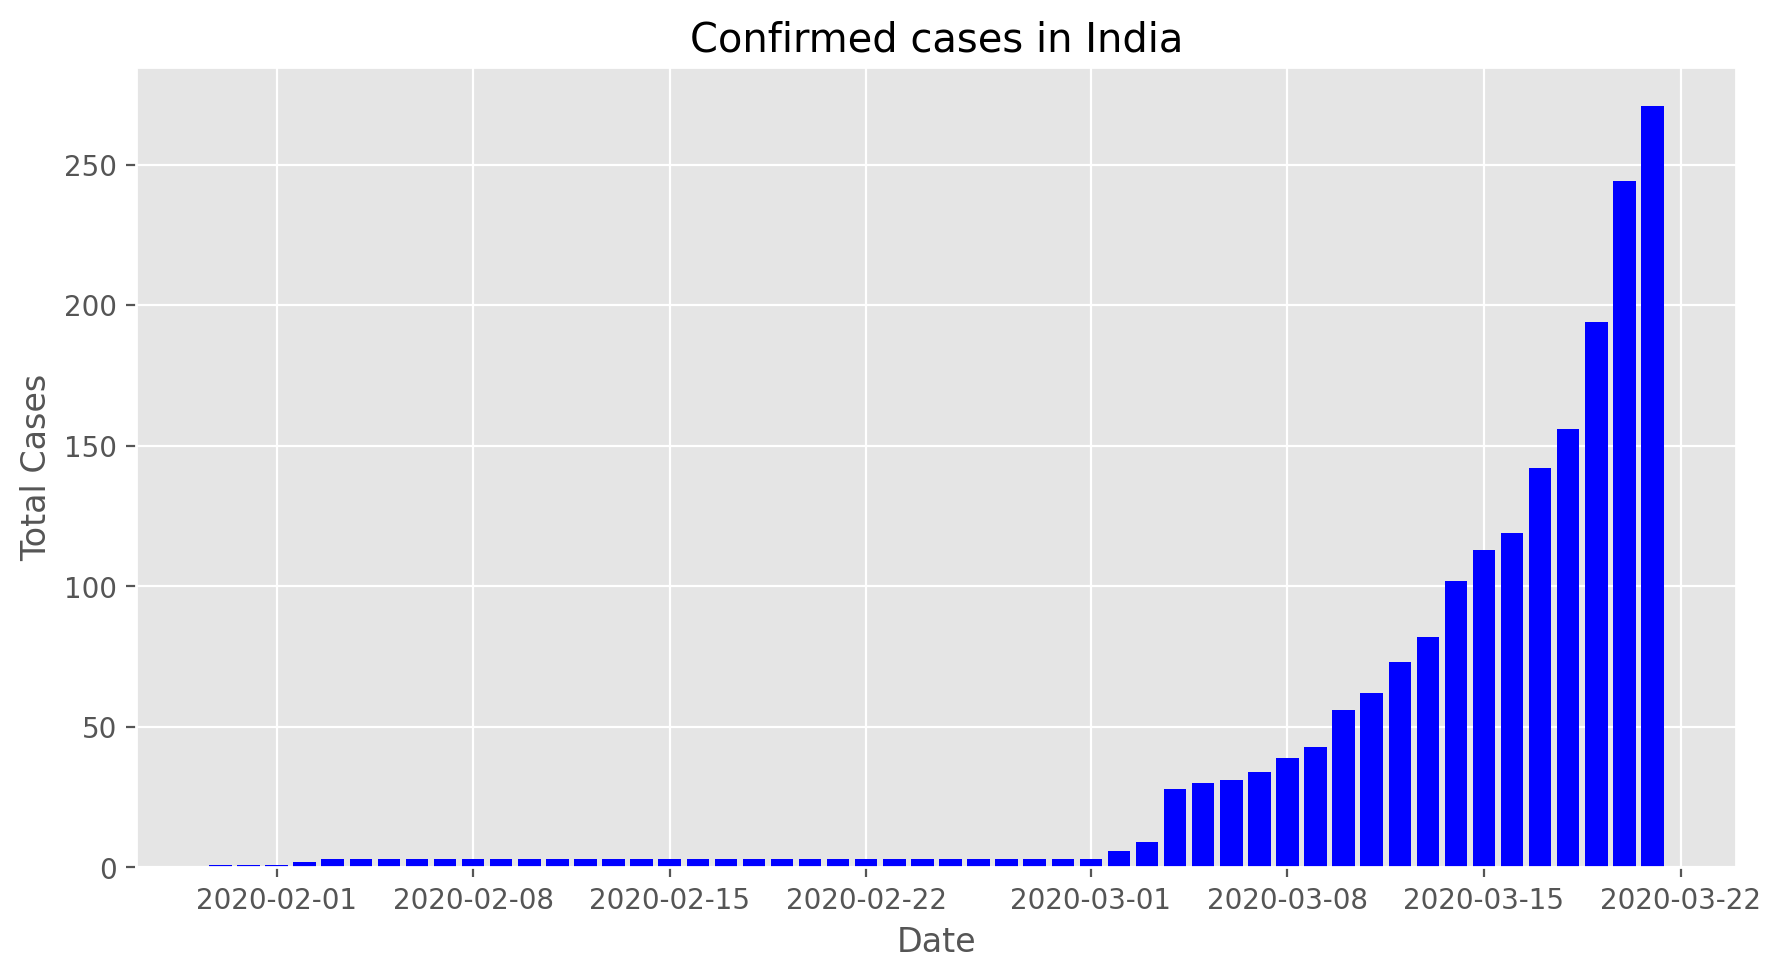

In [71]:

#Matplotlib
fig=plt.figure(figsize=(10,5),dpi=200)
axes=fig.add_axes([0.1,0.1,0.8,0.8])
axes.bar(dbd_India["Date"],dbd_India["Total Cases"],color='blue')
axes.set_xlabel("Date")
axes.set_ylabel("Total Cases")
axes.set_title("Confirmed cases in India")
plt.show()

In [72]:
fig=px.bar(dbd_Italy,x="Date",y="Total Cases",color='Total Cases',title='Confirmed cases in Italy')
fig.show()

fig=px.bar(dbd_Korea,x="Date",y="Total Cases",color='Total Cases',title='Confirmed cases in Korea')
fig.show()

fig=px.bar(dbd_Wuhan,x="Date",y="Total Cases",color='Total Cases',title='Confirmed cases in Wuhan')
fig.show()

In [3]:
map=folium.Map(location=[20,70],zoom_start=4,tiles='stamenterrain')

In [4]:
map